## 绘平面图，加分组颜色

In [1]:


%matplotlib inline
import numpy as np
import pandas as pd
import os,sys
import utilities as utils
import matplotlib.pyplot as plt

unix_time = 'Time since the epoch [s]'
from rich.progress import track
import time


In [2]:
# 2
ori_path = '/home/esmidth/github/DCS/Sensorscope/luce_stations/'
sub_prefix = 'sensorscope-meteo-'
sub_suffix = '.txt'
file_list = os.listdir(ori_path)
name = [
'Station ID',
'Year',
'Month',
'Day',
'Hour',
'Minute',
'Second',
'Time since the epoch [s]',
'Sequence Number',
'Ambient Temperature',
'Surface Temperature',
'Solar Radiation',
'Relative Humidity [%]',
'Soil Moisture [%]',
'Watermark [kPa]',
'Rain Meter [mm]',
'Wind Speed [m/s]',
'Wind Direction [°]',
]

In [4]:
# 4
lat = (46.51788,46.52227)
log = (6.56517,6.5693)

loc_file = '/home/esmidth/github/DCS/Sensorscope/EPFL_sensor_loc_simple2.xlsx'
df = pd.read_excel(loc_file)

lat_range = np.linspace(lat[0],lat[1],11)
log_range = np.linspace(log[0],log[1],11)
# print(lat_range)
# print(log_range)

In [33]:
df_sum = pd.read_hdf('r_data_files/data_ori_na.h5','df')
df_sum_sa = pd.read_hdf('r_data_files/data_sa_na.h5','df')


In [34]:
df_sum

,Station ID,Year,Month,Day,Hour,Minute,Second,Time since the epoch [s],Sequence Number,Ambient Temperature,Surface Temperature,Relative Humidity [%],time,time_30
0,12,2006.0,11.0,1.0,16.0,9.0,47.0,1.162394e+09,44958.0,10.26,10.037,48.657,21,0
1,12,2006.0,11.0,1.0,16.0,10.0,16.0,1.162394e+09,44959.0,10.27,9.975,48.721,50,1
2,12,2006.0,11.0,1.0,16.0,10.0,45.0,1.162394e+09,44960.0,10.25,9.975,48.502,79,2
3,12,2006.0,11.0,1.0,16.0,11.0,15.0,1.162394e+09,44961.0,10.26,9.975,48.627,109,3
4,12,2006.0,11.0,1.0,16.0,11.0,44.0,1.162394e+09,44962.0,10.24,9.975,48.964,138,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255937,71,2007.0,5.0,9.0,23.0,57.0,52.0,1.178748e+09,15783.0,13.14,9.162,73.917,16354106,545136
255938,71,2007.0,5.0,9.0,23.0,58.0,21.0,1.178748e+09,15784.0,13.10,9.412,73.698,16354135,545137
255939,71,2007.0,5.0,9.0,23.0,58.0,51.0,1.178748e+09,15785.0,13.10,9.162,73.777,16354165,545138
255940,71,2007.0,5.0,9.0,23.0,59.0,20.0,1.178748e+09,15786.0,13.08,9.100,73.852,16354194,545139


In [32]:
df_sum.to_hdf('r_data_files/data_ori_na.h5','df')

In [6]:
total_id_list = np.unique(df_sum['Station ID'].values)
print(total_id_list)

[  3   5   7   8   9  10  11  12  13  14  15  17  18  19  21  23  24  25
  26  27  30  31  32  33  34  35  36  37  39  40  41  42  43  44  45  46
  47  49  50  51  53  54  55  56  57  59  60  61  62  63  64  65  66  68
  69  70  71  72  73  75  76  79  80  81  82  84  85  87  88  89  92  93
  94  95  96  97  98  99 100 103 104 105 106 107 109 111 121 122]


In [12]:
time_start = int(np.min(df_sum[unix_time].values))
time_end = int(np.max(df_sum[unix_time].values))

unix_time_ori = df_sum[unix_time].values.astype(int)

unix_time_new = unix_time_ori-time_start
unix_time_new = unix_time_new.astype(int)


print(time_start)
print(time_end)
print(unix_time_ori[:5])
print(unix_time_new[:5])

1162393766
1178747999
[1162393787 1162393816 1162393845 1162393875 1162393904]
[ 21  50  79 109 138]


In [14]:
df_sum['time'] = unix_time_new

In [15]:
df_sum

,Station ID,Year,Month,Day,Hour,Minute,Second,Time since the epoch [s],Sequence Number,Ambient Temperature,Surface Temperature,Relative Humidity [%],time
0,12,2006.0,11.0,1.0,16.0,9.0,47.0,1.162394e+09,44958.0,10.26,10.037,48.657,21
1,12,2006.0,11.0,1.0,16.0,10.0,16.0,1.162394e+09,44959.0,10.27,9.975,48.721,50
2,12,2006.0,11.0,1.0,16.0,10.0,45.0,1.162394e+09,44960.0,10.25,9.975,48.502,79
3,12,2006.0,11.0,1.0,16.0,11.0,15.0,1.162394e+09,44961.0,10.26,9.975,48.627,109
4,12,2006.0,11.0,1.0,16.0,11.0,44.0,1.162394e+09,44962.0,10.24,9.975,48.964,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255937,71,2007.0,5.0,9.0,23.0,57.0,52.0,1.178748e+09,15783.0,13.14,9.162,73.917,16354106
255938,71,2007.0,5.0,9.0,23.0,58.0,21.0,1.178748e+09,15784.0,13.10,9.412,73.698,16354135
255939,71,2007.0,5.0,9.0,23.0,58.0,51.0,1.178748e+09,15785.0,13.10,9.162,73.777,16354165
255940,71,2007.0,5.0,9.0,23.0,59.0,20.0,1.178748e+09,15786.0,13.08,9.100,73.852,16354194


In [18]:
unix_time_new_30 = unix_time_new / 30

print(unix_time_new_30[:5])

unix_time_new_30 = unix_time_new_30.astype(int)

print(unix_time_new_30[:5])

[0.7        1.66666667 2.63333333 3.63333333 4.6       ]
[0 1 2 3 4]


In [19]:
df_sum['time_30'] = unix_time_new_30

In [24]:
df_sum[df_sum['time_30'] == 2]['Station ID'].values

array([12,  3, 14, 24, 17, 36, 23,  8, 15, 35, 44, 37, 26, 45, 46,  5, 41,
       25, 43, 39, 13, 42, 40, 21])

In [31]:
# 统计一下选择什么区间更为合适
time_max_unbiased = df_sum['time_30'].values

df_time = pd.DataFrame()

overflow = 0

id_time_map = {}

for time_id in track(time_max_unbiased):
    tmp_df = df_sum[df_sum['time_30'] == time_id]
    

    # print(len(tmp_id))
print(overflow)

Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 7 days, 17:08:35

KeyboardInterrupt: 

In [5]:
def draw_lune_heatmap(df,res,lat=lat,log=log):
    lat_range = np.linspace(lat[1],lat[0],res+1)
    log_range = np.linspace(log[0],log[1],res+1)
    pic = np.zeros((res,res))
    pic2 = np.zeros((res,res))
    pairs = []
    for i in range(res):
        # print(i,lat_range[i],lat_range[i+1])
        for j in range(res):
            sub_df = df[(df['Latitude'] < lat_range[i]) & (df['Latitude'] > lat_range[i+1]) & (df['Longitude'] > log_range[j]) & (df['Longitude'] < log_range[j+1])]
            pic[i][j] = len(sub_df)
            if len(sub_df) > 0:
                pic2[i][j]=1
            # pic[i][j] = i*res+j
            if len(sub_df) > 1:
                pairs.append([i*res+j,sub_df['ID'].values])
            max_value = 0
            max_id = 0
            for value in sub_df['ID'].values:
                # print(value)
                if len(sub_df[sub_df['ID'] == value]) > max_value:
                    max_id =value
            pic[i][j] = max_id
    return pic,pairs,pic2
# 输出的pic有颜色明暗，pic2为黑白两色

[[14, array([ 3, 23, 42])], [15, array([ 5, 17])], [24, array([21, 26, 41])], [25, array([14, 30, 39, 56])], [26, array([  9,  15,  18,  24,  37,  44, 105, 121])], [27, array([12, 45, 46])], [28, array([ 8, 25, 36])], [33, array([64, 75, 99])], [36, array([13, 40])], [37, array([ 34,  43, 106])], [53, array([ 70, 122])], [54, array([49, 68])], [63, array([66, 72])], [64, array([54, 73])], [66, array([ 32,  35,  50,  94, 107])], [69, array([79, 95])], [75, array([92, 97])], [77, array([33, 53])], [78, array([10, 19])], [91, array([85, 89])]]
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 63.   0.   0.   0.  42.  17.   0.   0.   0.   0.]
 [ 47.   7.  27.   0.  41.  56. 121.  46.  36.   0.]
 [  0.   0. 111.  99.  57.  59.  40. 106.   0.   0.]
 [  0.  61.  71.  65.   0.  82.  62.   0.  76.   0.]
 [  0.  51.  11. 122.  68.   0.   0.  60.   0.   0.]
 [ 84.  81.  55.  72.  73.   0. 107.  31.  69.  95.]
 [103.  80.  96.   0.   0.  97. 100.  53.  19.  93.]
 [109.  87.   0.   0. 104.   

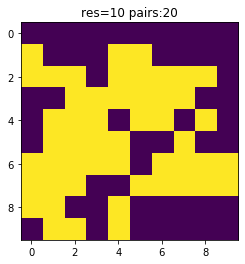

In [33]:
res = 10
pic,pairs,pic2 = draw_lune_heatmap(df,res,lat,log)
plt.title('res='+str(res)+' pairs:'+str(len(pairs)))
plt.grid(b=False)
plt.imshow(pic2)
print(pairs)
print(pic)

In [14]:
df

,ID,Est,Nord,Altitude,Latitude,Longitude
0,3,533132.46,152616.25,395.48,46.521505,6.567198
1,5,533141.93,152606.04,395.51,46.521414,6.567323
2,7,533034.49,152587.98,395.75,46.521241,6.565925
3,8,533245.87,152585.14,395.67,46.521236,6.568681
4,9,533169.64,152603.12,403.69,46.521391,6.567684
...,...,...,...,...,...,...
83,107,533182.74,152397.99,411.32,46.519546,6.567886
84,109,532984.12,152270.90,404.43,46.518384,6.565315
85,111,533045.06,152542.96,411.32,46.520837,6.566070
86,121,533191.17,152577.42,404.00,46.521161,6.567971


In [15]:
log_list = df['Longitude'].values
lat_list = df['Latitude'].values
id_list = df["ID"].values
print(log_list)
print(lat_list)
print(id_list)

[6.56719805 6.56732297 6.56592547 6.56868051 6.56768446 6.56850025
 6.56617663 6.56827378 6.5680396  6.56756638 6.56803277 6.56745946
 6.56768815 6.568523   6.5670919  6.567094   6.567675   6.56857529
 6.56719841 6.566208   6.56751097 6.56833321 6.56805774 6.56815298
 6.568437   6.567958   6.56848945 6.56802831 6.56742949 6.567693
 6.56718809 6.56708568 6.56812835 6.56803851 6.56813873 6.56845225
 6.565467   6.56689511 6.56801784 6.56560554 6.56823748 6.56689249
 6.56632556 6.56741126 6.56703578 6.56746956 6.56820233 6.56569049
 6.56783469 6.565462   6.56675832 6.56649308 6.56652378 6.56710594
 6.56858236 6.56658368 6.56629314 6.56664544 6.56707357 6.56646911
 6.56853032 6.56892032 6.56583725 6.56590917 6.56757496 6.56550752
 6.56572964 6.56594156 6.56636826 6.56574571 6.56744103 6.56888764
 6.56773286 6.56890737 6.56608632 6.5673642  6.5669467  6.56654164
 6.56765665 6.56547565 6.56695902 6.56782387 6.56824549 6.56788627
 6.56531518 6.56606966 6.56797067 6.5667838 ]
[46.52150496 46.52

In [111]:
for i,item in enumerate(pairs):
    # print(item[1],i)
    for j in item[1]:
        # print(df[df['ID'] == j])
        df.loc[df['ID']==j,'color'] = i

color_max = int(np.max(df['color']))
color_len = len(df.loc[~df['color'].notna(),'color'])
color_range = np.arange(color_max+1,color_max+color_len+1)
# print(color_range)
# print(len(color_range))
df.loc[~df['color'].notna(),'color'] = color_range
color_list = df['color'].values

In [121]:
df

,ID,Est,Nord,Altitude,Latitude,Longitude,color
0,3,533132.46,152616.25,395.48,46.521505,6.567198,0.0
1,5,533141.93,152606.04,395.51,46.521414,6.567323,1.0
2,7,533034.49,152587.98,395.75,46.521241,6.565925,20.0
3,8,533245.87,152585.14,395.67,46.521236,6.568681,6.0
4,9,533169.64,152603.12,403.69,46.521391,6.567684,4.0
...,...,...,...,...,...,...,...
83,107,533182.74,152397.99,411.32,46.519546,6.567886,14.0
84,109,532984.12,152270.90,404.43,46.518384,6.565315,49.0
85,111,533045.06,152542.96,411.32,46.520837,6.566070,50.0
86,121,533191.17,152577.42,404.00,46.521161,6.567971,4.0
